In [5]:
pip install numpy==1.26.4


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
streamlit 1.32.0 requires pillow<11,>=7.1.0, but you have pillow 12.0.0 which is incompatible.


Masked: =S7075159C at (96, 99, 91, 13)


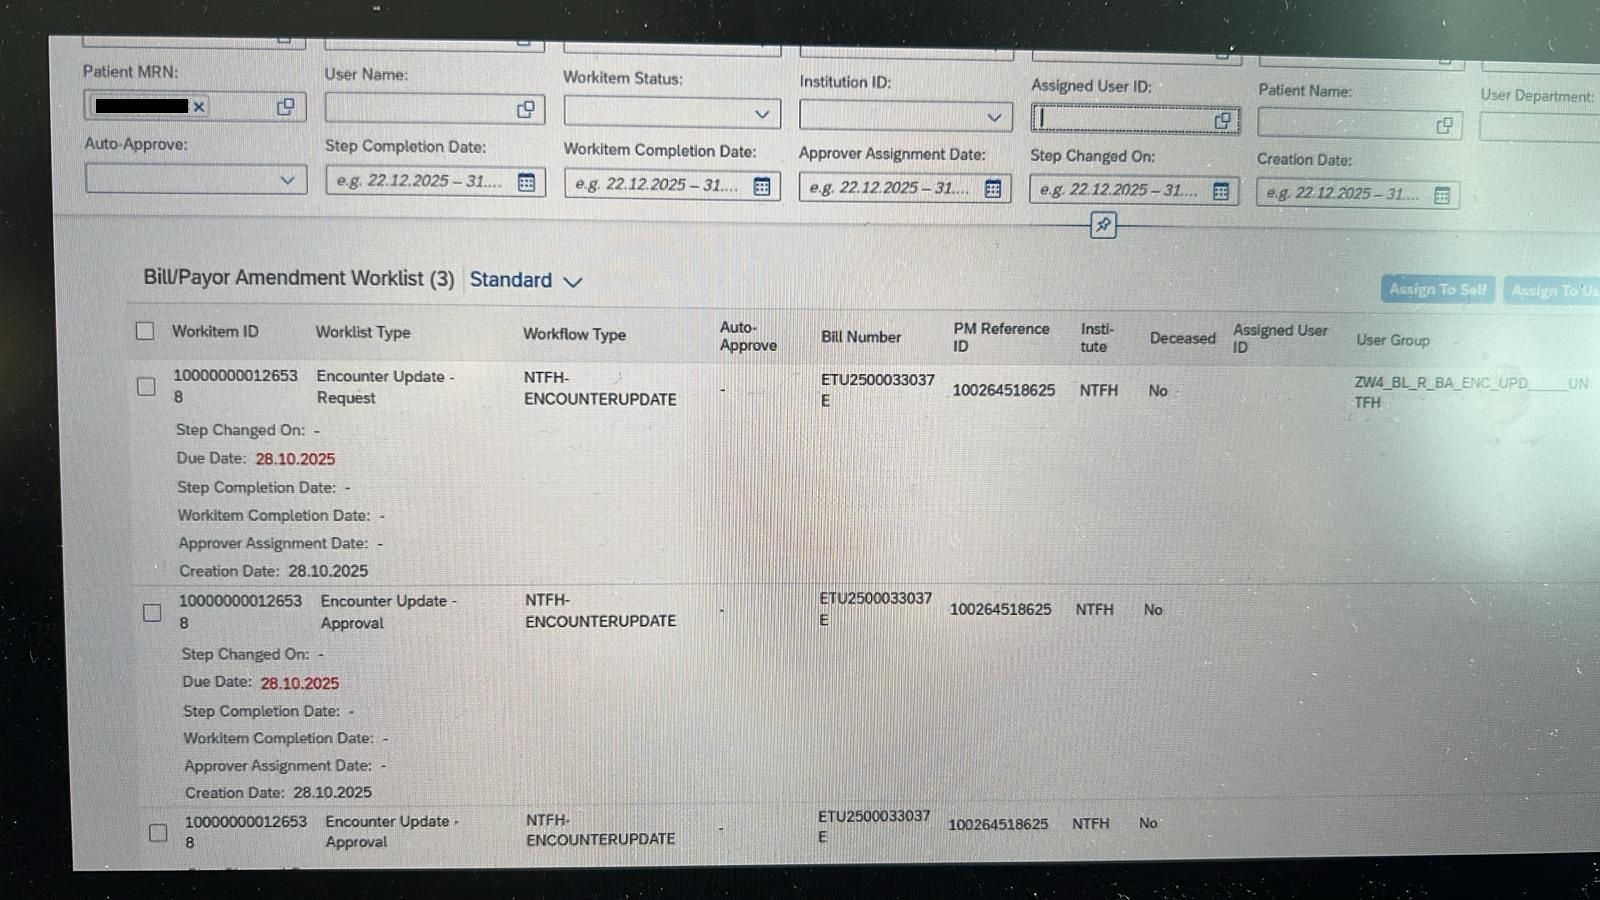

In [81]:
import cv2
import pytesseract
import re
from PIL import Image
from IPython.display import display

ocr_corrections = {
    '$': 'S',
    '0': 'O',   # or vice versa depending on context
    '1': 'I',
    'O': '0',
    # add more if needed
}

def fix_ocr_text(text):
    return ''.join(ocr_corrections.get(c, c) for c in text)


# -----------------------------
# Step 0: Optional - Tesseract path (Windows)
# Uncomment and set your Tesseract path if needed
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# -----------------------------
# Step 1: Load image (direct path)
image_path = r"D:/TESTCASE INT/badjob.jpg"  # <-- change this to your file
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Cannot read image: {image_path}")

# -----------------------------
# Step 2: Convert to RGB for pytesseract
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# -----------------------------
# Step 3: Run OCR
ocr_data = pytesseract.image_to_data(rgb_image, output_type=pytesseract.Output.DICT)

# -----------------------------
# Step 4: Define NRIC regex pattern (Singapore example)
nric_pattern = re.compile(r'^[=:$\s]*[1$SMTFG]\d{7}[10A-Z]$', re.IGNORECASE)

# -----------------------------
# Step 5: Detect and mask NRICs
masked_count = 0
for i, text in enumerate(ocr_data['text']):
    if re.fullmatch(nric_pattern, text.strip()):
        x, y, w, h = ocr_data['left'][i], ocr_data['top'][i], ocr_data['width'][i], ocr_data['height'][i]
        masked_count += 1
        print(f"Masked: {text} at ({x}, {y}, {w}, {h})")

        # Option 1: Black rectangle
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 0), -1)

        # Option 2 (alternative): Gaussian blur
        # roi = image[y:y+h, x:x+w]
        # blurred = cv2.GaussianBlur(roi, (51, 51), 0)
        # image[y:y+h, x:x+w] = blurred

if masked_count == 0:
    print("No NRIC numbers detected.")

# -----------------------------
# Step 6: Save and display masked image
output_path = "masked_nric.jpg"
cv2.imwrite(output_path, image)
display(Image.open(output_path))

In [75]:
for i, text in enumerate(ocr_data['text']):
    print(f"[{i}] '{text}'")


[0] ''
[1] ''
[2] ''
[3] ''
[4] 'Patient'
[5] 'name:'
[6] 'Quantavius'
[7] 'the'
[8] 'first'
[9] ''
[10] 'MRN:'
[11] '111245870'
[12] ''
[13] ''
[14] ''
[15] 'pmref:'
[16] '100000578693'
[17] ''
[18] 'bill'
[19] 'no.'
[20] '£1U1573895938'
